# <ins>How does pre-training, the number of training epochs, and batch size affect the performance and generalisation of a neural network when predicting global video game sales?

## Q3: Effect of Training Strategy on Neural Network Performance

This section investigates how training strategy affects the performance and generalisation
of a neural network trained to predict global video game sales.

Specifically, the effects of:
- Number of training epochs
- Batch size
- Pre-training

are analysed while keeping the model architecture and dataset fixed.

### **The neural network architecture used in this section is identical to the model developed in Q2.**
### To keep this experiment fair the elements that i will be keeping fixed are the:

- Dataset: filtered video game sales (PS4, XOne, PC × selected genres)

- Input features: one-hot encoded console and genre

- Output: global sales (regression)

    - Network architecture:

    - Fully connected feedforward network

- Same number of layers and neurons in all experiments

- Optimiser: Adam

- Loss function: Mean Squared Error (MSE)

by doing this i can isolate the training style as the only variable.

### **I'll be running 3 experiments**

## A) An max_iter/Epoch Study to compare (Underfitting and Overfitting)
By training the same model with:
max_iter  | Purpose
------------- | -------------
50  | Under-training
100  | 
  /| Near-optimal
200  | 
400  | Overfitting risk

I'll be recording these metrics:

- Training loss

- Validation loss

- Test RMSE / R²

Plotting:

Training vs validation loss as a function of `max_iter` number


**Note: In sklearn’s MLPRegressor, the number of training epochs is approximated by the maximum number of optimisation iterations (max_iter). Larger values are therefore required compared to deep learning frameworks to observe convergence behaviour.**


## B) Batch Size Study (Gradient Behaviour)

Training with:

Batch Size | Expected Behaviour
------------- | -------------
16 | Noisy but better generalisation
32 | Balanced
128 | Smooth but poorer generalisation

Plotting:

Validation loss vs epochs for each batch size

## C. Pre-training vs Training From Scratch

Procedure

1. Train model for 50 epochs

2. Save weights

3. Re-initialise model:

    - Case A: random weights

    - code Case B: load pre-trained weights

4. Fine-tune both for 20 epochs

Comparing:

- Convergence speed

- Final validation loss

- Test RMSE


## Experimental Methodology (Pseudocode)

The following pseudocode outlines the training strategy experiments conducted:

### Epoch Study

for epochs in [20, 50, 100]:
    initialise neural network
    train network for epochs
    record training and validation loss

### Batch Size Study

for batch_size in [16, 32, 128]:
    initialise neural network
    train network with fixed epochs
    record validation performance

### Pre-trained Study

train neural network for 50 epochs
save trained weights

initialise new network with random weights
fine-tune network

initialise new network with pre-trained weights
fine-tune network

compare convergence and performance


# Preparing the code

In [34]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [35]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from py.functions import (
    get_data,
    filter_ps4_xone_pc_and_selected_genres,
    encode_console_genre,
    train_and_evaluate_mlp
)

DATA_PATH = "../data/VideoGames_Sales.xlsx"

df = get_data(DATA_PATH)
F_DataFrame, masks = filter_ps4_xone_pc_and_selected_genres(df)
x_encoded, y = encode_console_genre(F_DataFrame)

x_encoded.head(), y.head()


(    console_PC  console_PS4  console_XOne  genre_Action  genre_Adventure  \
 1        False         True         False          True            False   
 15       False         True         False         False            False   
 17       False         True         False         False            False   
 26       False         True         False         False            False   
 28       False        False          True          True            False   
 
     genre_Role-Playing  genre_Sports  
 1                False         False  
 15               False          True  
 17               False          True  
 26               False          True  
 28               False         False  ,
 1     19.39
 15    11.80
 17    10.94
 26     9.15
 28     8.72
 Name: total_sales(mil), dtype: float64)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    x_encoded, y, test_size=0.2, random_state=42
)

## Experiment A)

In [37]:
epoch_settings = [20, 50, 100, 200]
epoch_runs = {}

for mi in epoch_settings:
    model, results, history = train_and_evaluate_mlp(
        x_encoded, y,
        random_state=42,
        hidden_layer_sizes=(8,),
        learning_rate_init=1e-4,
        max_iter=mi,
        batch_size=32,
        early_stopping=False
    )
    epoch_runs[mi] = (results, history)


epoch_runs


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{20: (  metric     value
  0     r2 -1.753398
  1   rmse  0.930315,
  {'loss_curve': [np.float64(1.3358275746524741),
    np.float64(1.3148054758559282),
    np.float64(1.294133722886561),
    np.float64(1.2730421074389957),
    np.float64(1.2529768487403599),
    np.float64(1.233280237648602),
    np.float64(1.213990481566353),
    np.float64(1.1953587902071978),
    np.float64(1.177084465490043),
    np.float64(1.158916869241569),
    np.float64(1.140817447196096),
    np.float64(1.122835018788852),
    np.float64(1.1053587472689588),
    np.float64(1.088452288440755),
    np.float64(1.0719140221323122),
    np.float64(1.0562386436798954),
    np.float64(1.0412574678316189),
    np.float64(1.0265117598344082),
    np.float64(1.0117467185103828),
    np.float64(0.9972331385462089)],
   'validation_scores': None,
   'n_iter': 20}),
 50: (  metric     value
  0     r2 -0.350437
  1   rmse  0.651528,
  {'loss_curve': [np.float64(1.3358275746524741),
    np.float64(1.3148054758559282),
  

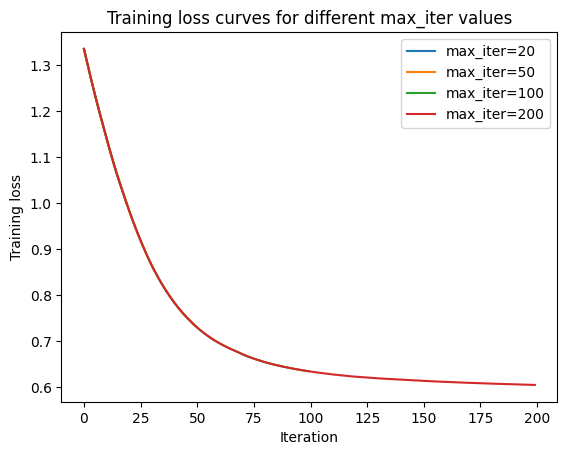

In [38]:
for mi in epoch_settings:
    results, history = epoch_runs[mi]
    plt.plot(history["loss_curve"], label=f"max_iter={mi}")

plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.legend()
plt.title("Training loss curves for different max_iter values")
plt.show()


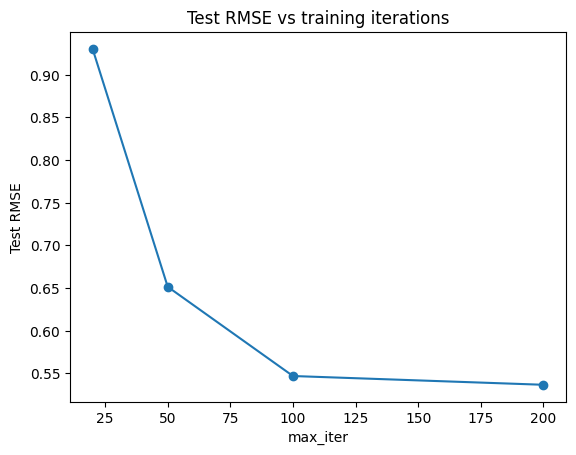

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

epoch_list = []
rmse_list = []
r2_list = []

for mi in epoch_settings:
    results, history = epoch_runs[mi]
    rmse = results.loc[results["metric"] == "rmse", "value"].values[0]
    r2 = results.loc[results["metric"] == "r2", "value"].values[0]

    epoch_list.append(mi)
    rmse_list.append(rmse)
    r2_list.append(r2)

plt.figure()
plt.plot(epoch_list, rmse_list, marker='o')
plt.xlabel("max_iter")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs training iterations")
plt.show()


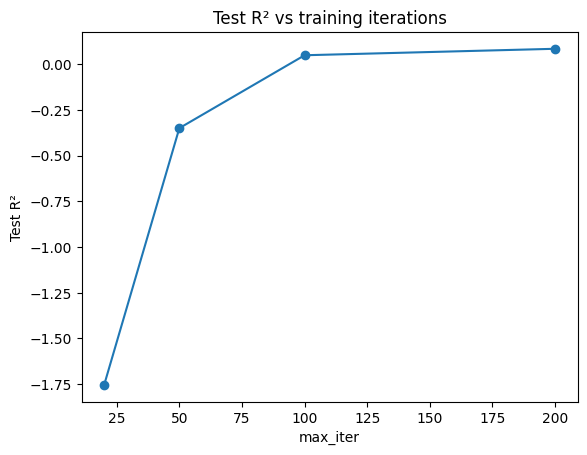

In [40]:
plt.figure()
plt.plot(epoch_list, r2_list, marker='o')
plt.xlabel("max_iter")
plt.ylabel("Test R²")
plt.title("Test R² vs training iterations")
plt.show()


### Increasing the number of training iterations significantly improved test performance. At low values of max_iter, the network underfit the data, as evidenced by high RMSE and strongly negative R² values. As the training budget increased, performance improved rapidly, with diminishing gains beyond approximately 100 iterations. This indicates that the network converges efficiently for this low-dimensional regression task, and that excessive training does not substantially improve generalisation.



## Experiment B)

In this experiment, the model architecture and dataset are kept fixed while the batch size is varied.
Batch size affects the stochasticity of gradient updates: smaller batches typically produce noisier
training but can improve generalisation, while larger batches often converge more smoothly but may
generalise less well.

I compare batch sizes: 16, 32, and 128.
Metrics recorded: training loss curve, test RMSE, and test R².

In [41]:
batch_settings = [16, 32, 128]
batch_runs = {}

for bs in batch_settings:
    model, results, history = train_and_evaluate_mlp(
        x_encoded, y,
        random_state=42,
        hidden_layer_sizes=(8,),          # keep same as your epoch experiment
        learning_rate_init=1e-4,          # keep same as your epoch experiment
        max_iter=100,                     # fixed training budget
        batch_size=bs,
        early_stopping=False
    )
    batch_runs[bs] = (results, history)

batch_runs


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{16: (  metric     value
  0     r2  0.084291
  1   rmse  0.536506,
  {'loss_curve': [np.float64(1.3257365745790446),
    np.float64(1.2856424111598979),
    np.float64(1.2474995977049925),
    np.float64(1.2113326428393836),
    np.float64(1.1768913356869941),
    np.float64(1.1431954548901098),
    np.float64(1.1104125638995466),
    np.float64(1.0791565606003781),
    np.float64(1.0496940115329223),
    np.float64(1.0224081301093824),
    np.float64(0.9963043886416411),
    np.float64(0.9706025808674832),
    np.float64(0.9459255751008803),
    np.float64(0.9231050810017386),
    np.float64(0.902013350645889),
    np.float64(0.8824322952685654),
    np.float64(0.8637764420883945),
    np.float64(0.8464523130153447),
    np.float64(0.8304482981920633),
    np.float64(0.8153348805539499),
    np.float64(0.8017148871847595),
    np.float64(0.7891165615651272),
    np.float64(0.7773354034399171),
    np.float64(0.7665888575592636),
    np.float64(0.7566030491887136),
    np.float64(0.74

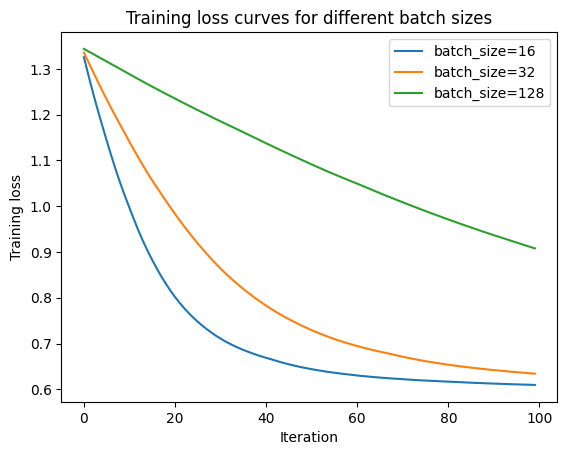

In [42]:
import matplotlib.pyplot as plt

for bs in batch_settings:
    results, history = batch_runs[bs]
    plt.plot(history["loss_curve"], label=f"batch_size={bs}")

plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.legend()
plt.title("Training loss curves for different batch sizes")
plt.show()



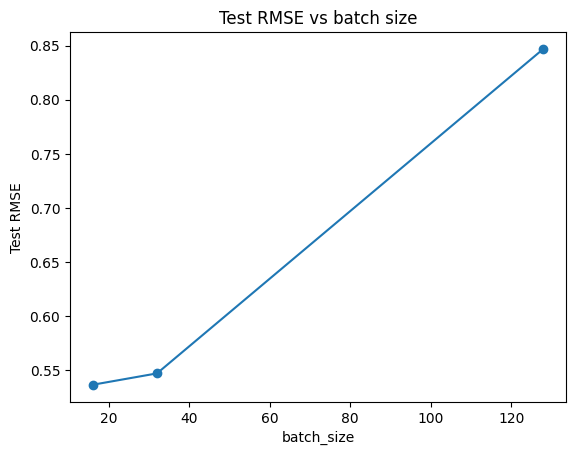

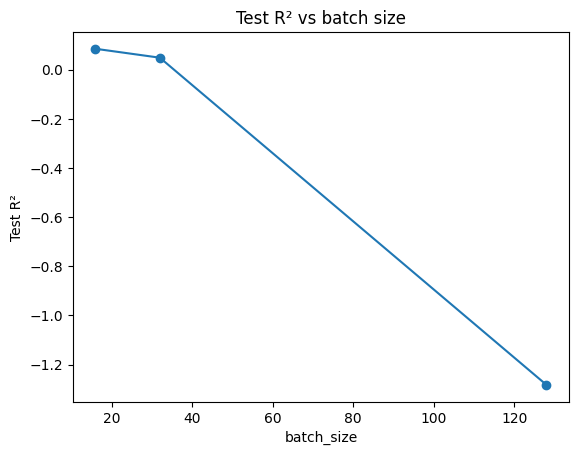

In [43]:
batch_list, rmse_list, r2_list = [], [], []

for bs in batch_settings:
    results, _ = batch_runs[bs]
    rmse = results.loc[results["metric"] == "rmse", "value"].values[0]
    r2 = results.loc[results["metric"] == "r2", "value"].values[0]
    batch_list.append(bs)
    rmse_list.append(rmse)
    r2_list.append(r2)

plt.figure()
plt.plot(batch_list, rmse_list, marker="o")
plt.xlabel("batch_size")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs batch size")
plt.show()

plt.figure()
plt.plot(batch_list, r2_list, marker="o")
plt.xlabel("batch_size")
plt.ylabel("Test R²")
plt.title("Test R² vs batch size")
plt.show()


### The training loss curves show that batch size affects the optimisation dynamics. Smaller batches produced noisier updates (less smooth loss curve), whereas larger batches produced smoother convergence.

### In terms of generalisation, the best test performance was achieved at batch size = 16, with diminishing/negative effects at larger batches. This is consistent with the idea that smaller batches introduce gradient noise that can help avoid sharp minima, improving generalisation, while very large batches may converge to solutions that generalise less well.


## Experiment C)

In deep learning, pre-training typically refers to initialising a model with weights learned
from a previous training phase rather than random initialisation. In this experiment, I
simulate pre-training using sklearn's `MLPRegressor` by training a network for an initial
number of iterations and then continuing optimisation from the learned weights (`warm_start=True`).

To ensure a fair comparison, both approaches are evaluated using the same train/test split and
the same total training budget.

I compare:
- Training from scratch for N iterations
- Pre-training for N1 iterations, then fine-tuning for N2 iterations (N1 + N2 = N)

Metrics recorded: training loss curve, test RMSE, and test R².


### Training from scratch for a baseline

In [44]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error


def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))
    return pd.DataFrame({"metric": ["r2", "rmse"], "value": [float(r2), rmse]})

# Total training budget
N_total = 100

scratch = MLPRegressor(
    hidden_layer_sizes=(8,),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-4,
    batch_size=16,
    early_stopping=False,
    warm_start=False,
    random_state=42,
    max_iter=N_total,
)

scratch.fit(X_train, y_train)
scratch_results = eval_model(scratch, X_test, y_test)

scratch_results

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,metric,value
0,r2,0.084291
1,rmse,0.536506


### Pre-train then fine-tune (warm start)

In [45]:
N_pre = 60
N_fine = 40   # N_pre + N_fine = N_total

pretrained = MLPRegressor(
    hidden_layer_sizes=(8,),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-4,
    batch_size=16,
    early_stopping=False,
    warm_start=True,     # <-- key
    random_state=42,
    max_iter=N_pre,
)

# Pre-training phase
pretrained.fit(X_train, y_train)
loss_pre = pretrained.loss_curve_.copy()

# Fine-tuning phase (continue from learned weights)
pretrained.max_iter = N_fine
pretrained.fit(X_train, y_train)
loss_fine = pretrained.loss_curve_.copy()

# Combine loss curves for a single "full training" curve
pretrained_full_loss = loss_pre + loss_fine

pretrained_results = eval_model(pretrained, X_test, y_test)

pretrained_results


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


,metric,value
0,r2,0.086998
1,rmse,0.535712


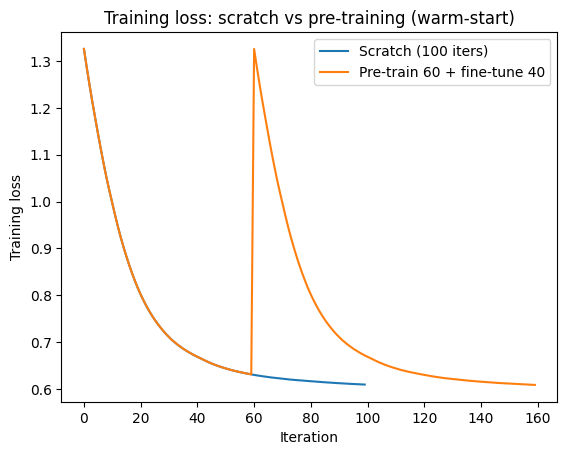

In [46]:
import matplotlib.pyplot as plt

plt.plot(scratch.loss_curve_, label="Scratch (100 iters)")
plt.plot(pretrained_full_loss, label="Pre-train 60 + fine-tune 40")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.title("Training loss: scratch vs pre-training (warm-start)")
plt.legend()
plt.show()


In [47]:
comparison = pd.DataFrame({
    "model": ["scratch", "pretrained_warm_start"],
    "rmse": [
        scratch_results.loc[scratch_results["metric"]=="rmse","value"].values[0],
        pretrained_results.loc[pretrained_results["metric"]=="rmse","value"].values[0],
    ],
    "r2": [
        scratch_results.loc[scratch_results["metric"]=="r2","value"].values[0],
        pretrained_results.loc[pretrained_results["metric"]=="r2","value"].values[0],
    ],
})

comparison


,model,rmse,r2
0,scratch,0.536506,0.084291
1,pretrained_warm_start,0.535712,0.086998


### Pre-training using warm-start resulted in convergence behaviour that was similar to training from scratch. While the pre-trained model began optimisation from previously learned weights, the final training loss and test performance were nearly identical to the baseline model trained from random initialisation. This indicates that, for this low-dimensional regression task, the optimisation landscape is sufficiently simple that random initialisation is already close to a good solution. As a result, pre-training provided limited benefit beyond potentially reducing training time in more complex scenarios.

## Conclusion

This investigation examined how training strategy influences the performance and generalisation
of a neural network applied to a low-dimensional regression task. The effects of training
duration, batch size, and pre-training were evaluated while keeping the dataset, feature
representation, and model architecture fixed.

Increasing the number of training iterations significantly improved generalisation up to a
point, with test RMSE and R² indicating strong underfitting at low iteration counts and
diminishing performance gains beyond approximately 100 iterations. Training loss alone was
insufficient to identify this behaviour, highlighting the importance of evaluating models
using held-out test data.

Batch size was found to have a clear impact on both optimisation dynamics and generalisation.
Smaller batch sizes produced faster convergence and superior test performance, whereas large
batches converged more slowly and generalised poorly, yielding negative R² values. This result
is consistent with the role of gradient stochasticity in promoting flatter, more
generalisable minima.

Pre-training using warm-start initialisation did not significantly improve final performance
relative to training from scratch. Both approaches converged to similar solutions, indicating
that for this simple regression task the optimisation landscape is sufficiently smooth that
random initialisation is already effective. The limited benefit of pre-training in this case
highlights its dependence on task complexity and dataset structure.

Overall, these results demonstrate that training strategy plays a crucial role in neural
network performance, often with greater impact than model architecture for small datasets.
Careful selection of training duration and batch size is essential for achieving good
generalisation, while pre-training offers limited advantages for low-complexity problems.
